In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
# Normalize the images to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0
# Reshape the images to include the channel dimension
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.1442 - accuracy: 0.9559 - val_loss: 0.0467 - val_accuracy: 0.9851
Epoch 2/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0443 - accuracy: 0.9862 - val_loss: 0.0360 - val_accuracy: 0.9879
Epoch 3/5
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0318 - accuracy: 0.9898 - val_loss: 0.0317 - val_accuracy: 0.9906
Epoch 4/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0257 - accuracy: 0.9915 - val_loss: 0.0330 - val_accuracy: 0.9896
Epoch 5/5
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0188 - accuracy: 0.9941 - val_loss: 0.0328 - val_accuracy: 0.9889


In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 - 3s - loss: 0.0328 - accuracy: 0.9889 - 3s/epoch - 10ms/step
Test accuracy: 0.9889000058174133


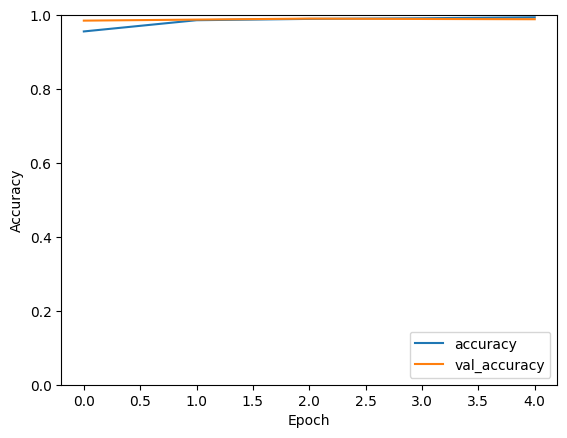

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

313/313 [==============================] - 4s 11ms/step


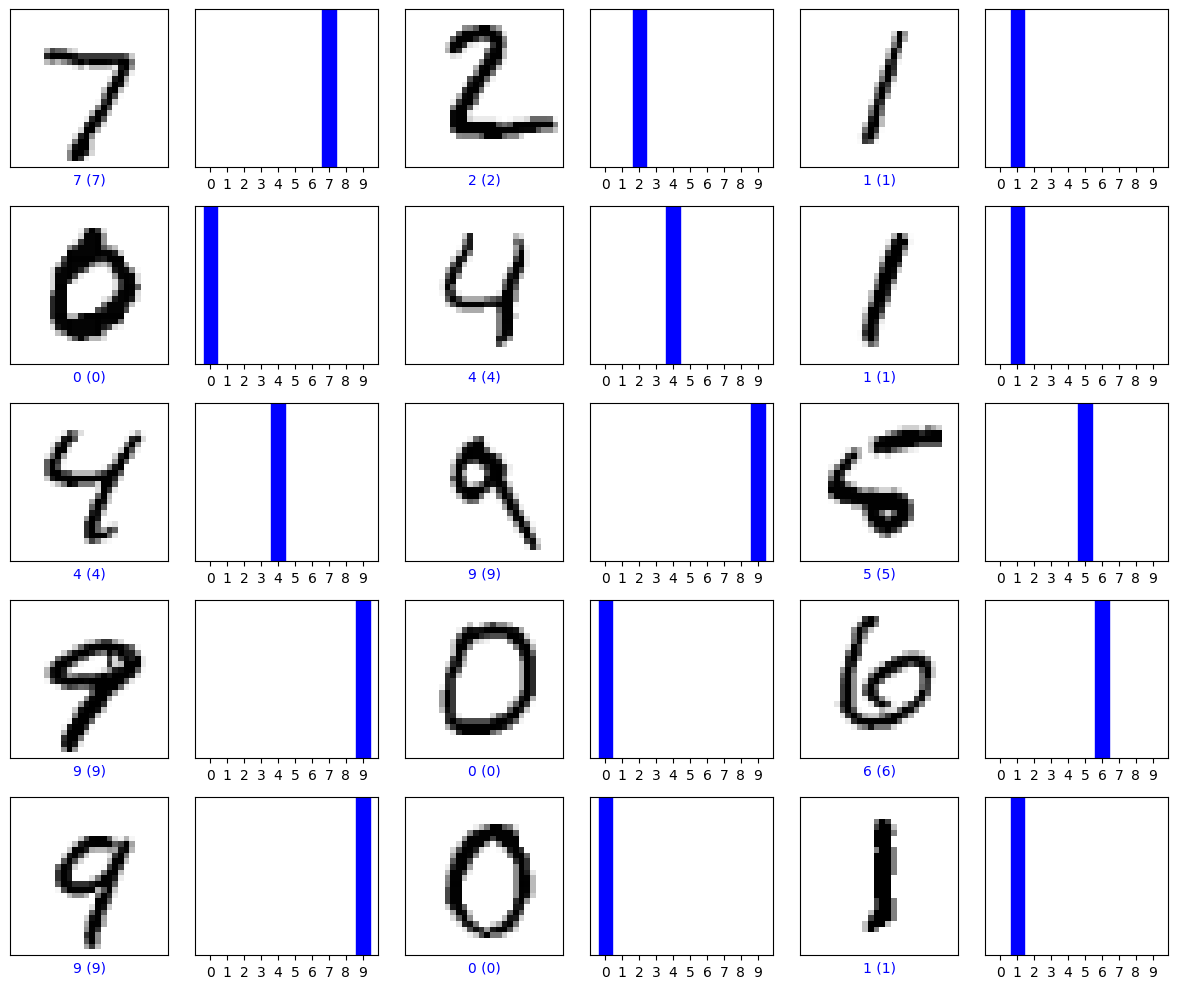

In [8]:
predictions = model.predict(test_images)

import numpy as np

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{predicted_label} ({true_label})", color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.tight_layout()
plt.show()

Custom Input image

In [13]:
from tensorflow.keras.preprocessing import image
import numpy as np
def load_and_preprocess_image(img_path):
    # Load the image
    img = image.load_img(img_path, color_mode='grayscale', target_size=(28, 28))
    # Convert the image to a numpy array
    img_array = image.img_to_array(img)
    # Normalize the image
    img_array = img_array / 255.0
    # Reshape the image to add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    return img_array
# Example of loading and preprocessing a new image
new_image_path ='th.jpeg'
new_image = load_and_preprocess_image(new_image_path)

In [14]:
# Make a prediction
new_image_prediction = model.predict(new_image)

# Get the predicted label
predicted_label = np.argmax(new_image_prediction)
print(f'Predicted label: {predicted_label}')


1/1 [==============================] - 0s 26ms/step
Predicted label: 8


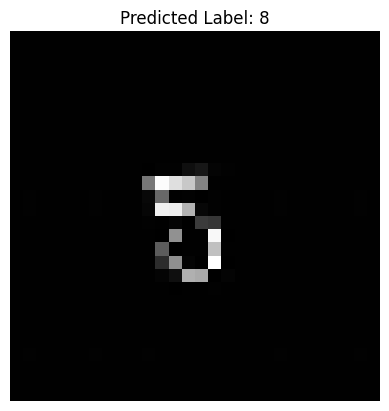

In [15]:
import matplotlib.pyplot as plt
def display_prediction(img_path, prediction):
    # Load the image (without preprocessing)
    img = image.load_img(img_path, color_mode='grayscale', target_size=(28, 28))
    # Convert the image to a numpy array
    img_array = image.img_to_array(img)
    # Display the image
    plt.imshow(img_array.squeeze(), cmap=plt.cm.binary)
    plt.title(f'Predicted Label: {np.argmax(prediction)}')
    plt.axis('off')
    plt.show()
# Display the new image and its prediction
display_prediction(new_image_path, new_image_prediction)

In [16]:
from tensorflow.keras.preprocessing import image
import numpy as np
def load_and_preprocess_image(img_path):
    # Load the image
    img = image.load_img(img_path, color_mode='grayscale', target_size=(28, 28))
    # Convert the image to a numpy array
    img_array = image.img_to_array(img)
    # Normalize the image
    img_array = img_array / 255.0
    # Reshape the image to add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    return img_array
# Example of loading and preprocessing a new image
new_image_path ='ok.jpeg'
new_image = load_and_preprocess_image(new_image_path)

In [17]:
# Make a prediction
new_image_prediction = model.predict(new_image)

# Get the predicted label
predicted_label = np.argmax(new_image_prediction)
print(f'Predicted label: {predicted_label}')


1/1 [==============================] - 0s 36ms/step
Predicted label: 2


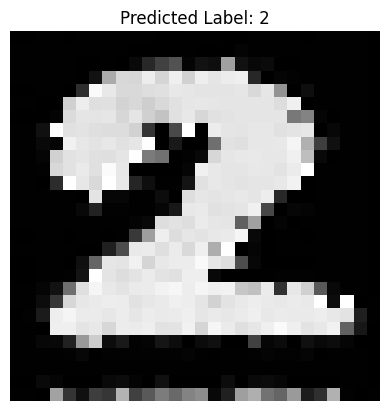

In [18]:
import matplotlib.pyplot as plt
def display_prediction(img_path, prediction):
    # Load the image (without preprocessing)
    img = image.load_img(img_path, color_mode='grayscale', target_size=(28, 28))
    # Convert the image to a numpy array
    img_array = image.img_to_array(img)
    # Display the image
    plt.imshow(img_array.squeeze(), cmap=plt.cm.binary)
    plt.title(f'Predicted Label: {np.argmax(prediction)}')
    plt.axis('off')
    plt.show()
# Display the new image and its prediction
display_prediction(new_image_path, new_image_prediction)